In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from scipy.stats import binom
from scipy.stats import weibull_min


https://data.gov.ie/dataset/a8e90f64-ddd1-4c29-97f4-dbabac4b0bee/resource/ada656d9-f9d4-4dfb-9049-62a3a526934a
https://data.gov.ie/dataset/general-election-of-may-2007-general-statistics

In [2]:

df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',nrows = 250)
#https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
df1 = df1.drop(['Longitude','Latitude','Wind Direction (Degrees True)'],axis =1)
#df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']



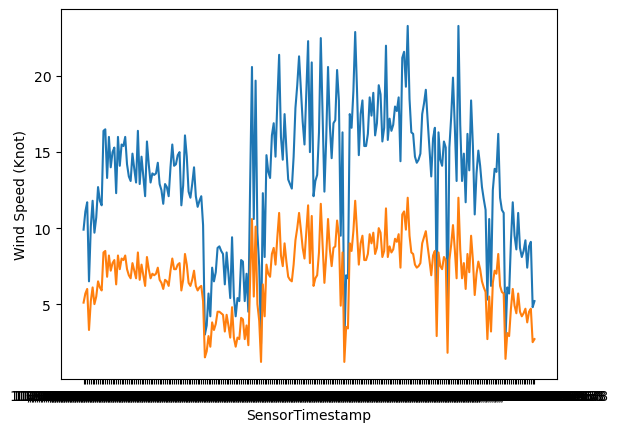

In [3]:
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Speed (Knot)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Speed (Meters/Sec)")
plt.show()

as shown above , data is sporadic so removing dates from start. need to figure out how to do date range 

In [4]:
df2=df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']
df2


,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Wind Speed (Meters/Sec),Barometric Pressure (Millibars)
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,3.3,1013.2
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,3.7,1013.0
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,4.5,1013.0
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,4.5,1012.9
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,4.4,1012.8
...,...,...,...,...,...,...,...
245,14/08/2015 22:14:57,9.2,29.8814,247.0,7.4,3.8,1011.9
246,14/08/2015 22:19:58,9.2,29.8784,265.4,8.8,4.5,1011.8
247,14/08/2015 22:24:58,9.1,29.8784,275.2,9.1,4.7,1011.8
248,14/08/2015 22:29:58,9.1,29.8784,263.8,4.8,2.5,1011.8


year column is int 64 bit

In [5]:
df2['SensorTimestamp']


72     14/08/2015 00:02:20
73     14/08/2015 00:07:21
74     14/08/2015 00:12:22
75     14/08/2015 00:17:22
76     14/08/2015 00:22:22
              ...         
245    14/08/2015 22:14:57
246    14/08/2015 22:19:58
247    14/08/2015 22:24:58
248    14/08/2015 22:29:58
249    14/08/2015 22:34:58
Name: SensorTimestamp, Length: 178, dtype: object

In [6]:
pd.to_datetime(df2['SensorTimestamp'])

72    2015-08-14 00:02:20
73    2015-08-14 00:07:21
74    2015-08-14 00:12:22
75    2015-08-14 00:17:22
76    2015-08-14 00:22:22
              ...        
245   2015-08-14 22:14:57
246   2015-08-14 22:19:58
247   2015-08-14 22:24:58
248   2015-08-14 22:29:58
249   2015-08-14 22:34:58
Name: SensorTimestamp, Length: 178, dtype: datetime64[ns]

new variable datetime added

In [7]:
df2['datetime'] = pd.to_datetime(df2['SensorTimestamp'])


C:\Users\irivyo\AppData\Local\Temp\ipykernel_16368\3869816751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['datetime'] = pd.to_datetime(df2['SensorTimestamp'])


In [8]:
df2['datetime']


72    2015-08-14 00:02:20
73    2015-08-14 00:07:21
74    2015-08-14 00:12:22
75    2015-08-14 00:17:22
76    2015-08-14 00:22:22
              ...        
245   2015-08-14 22:14:57
246   2015-08-14 22:19:58
247   2015-08-14 22:24:58
248   2015-08-14 22:29:58
249   2015-08-14 22:34:58
Name: datetime, Length: 178, dtype: datetime64[ns]

In [9]:
df3=df2.loc[df2.loc[:,'datetime'] <= '25/08/2015']
df3

c:\Users\irivyo\Anaconda3\lib\site-packages\pandas\core\arraylike.py:52: UserWarning: Parsing '25/08/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Wind Speed (Meters/Sec),Barometric Pressure (Millibars),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,3.3,1013.2,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,3.7,1013.0,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,4.5,1013.0,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,4.5,1012.9,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,4.4,1012.8,2015-08-14 00:22:22
...,...,...,...,...,...,...,...,...
245,14/08/2015 22:14:57,9.2,29.8814,247.0,7.4,3.8,1011.9,2015-08-14 22:14:57
246,14/08/2015 22:19:58,9.2,29.8784,265.4,8.8,4.5,1011.8,2015-08-14 22:19:58
247,14/08/2015 22:24:58,9.1,29.8784,275.2,9.1,4.7,1011.8,2015-08-14 22:24:58
248,14/08/2015 22:29:58,9.1,29.8784,263.8,4.8,2.5,1011.8,2015-08-14 22:29:58


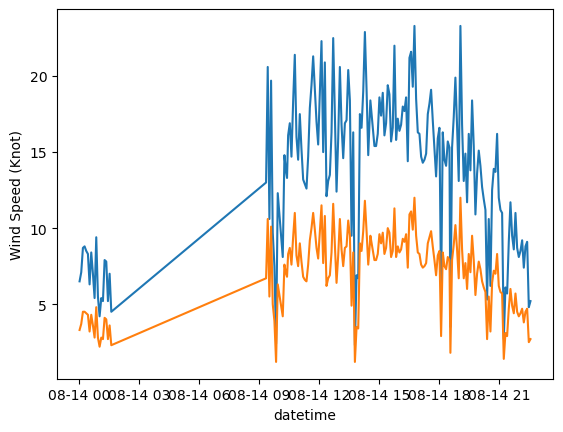

In [10]:
sns.lineplot(data=df3, x = "datetime", y = "Wind Speed (Knot)")
sns.lineplot(data=df3, x = "datetime", y = "Wind Speed (Meters/Sec)")
plt.show()

In [11]:
df3

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Wind Speed (Meters/Sec),Barometric Pressure (Millibars),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,3.3,1013.2,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,3.7,1013.0,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,4.5,1013.0,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,4.5,1012.9,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,4.4,1012.8,2015-08-14 00:22:22
...,...,...,...,...,...,...,...,...
245,14/08/2015 22:14:57,9.2,29.8814,247.0,7.4,3.8,1011.9,2015-08-14 22:14:57
246,14/08/2015 22:19:58,9.2,29.8784,265.4,8.8,4.5,1011.8,2015-08-14 22:19:58
247,14/08/2015 22:24:58,9.1,29.8784,275.2,9.1,4.7,1011.8,2015-08-14 22:24:58
248,14/08/2015 22:29:58,9.1,29.8784,263.8,4.8,2.5,1011.8,2015-08-14 22:29:58


In [12]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Wind Speed (Meters/Sec),Barometric Pressure (Millibars)
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,10.550000,29.854820,269.320225,13.747753,7.074157,1011.000000
std,0.674746,0.020915,15.175070,4.958861,2.551837,0.708224
min,9.000000,29.828200,219.100000,2.300000,1.200000,1010.100000
25%,10.200000,29.843000,258.100000,9.500000,4.900000,1010.600000
50%,10.800000,29.848900,270.250000,14.750000,7.600000,1010.800000
75%,11.000000,29.857800,281.475000,17.175000,8.800000,1011.100000
max,11.700000,29.919800,297.900000,23.300000,12.000000,1013.200000


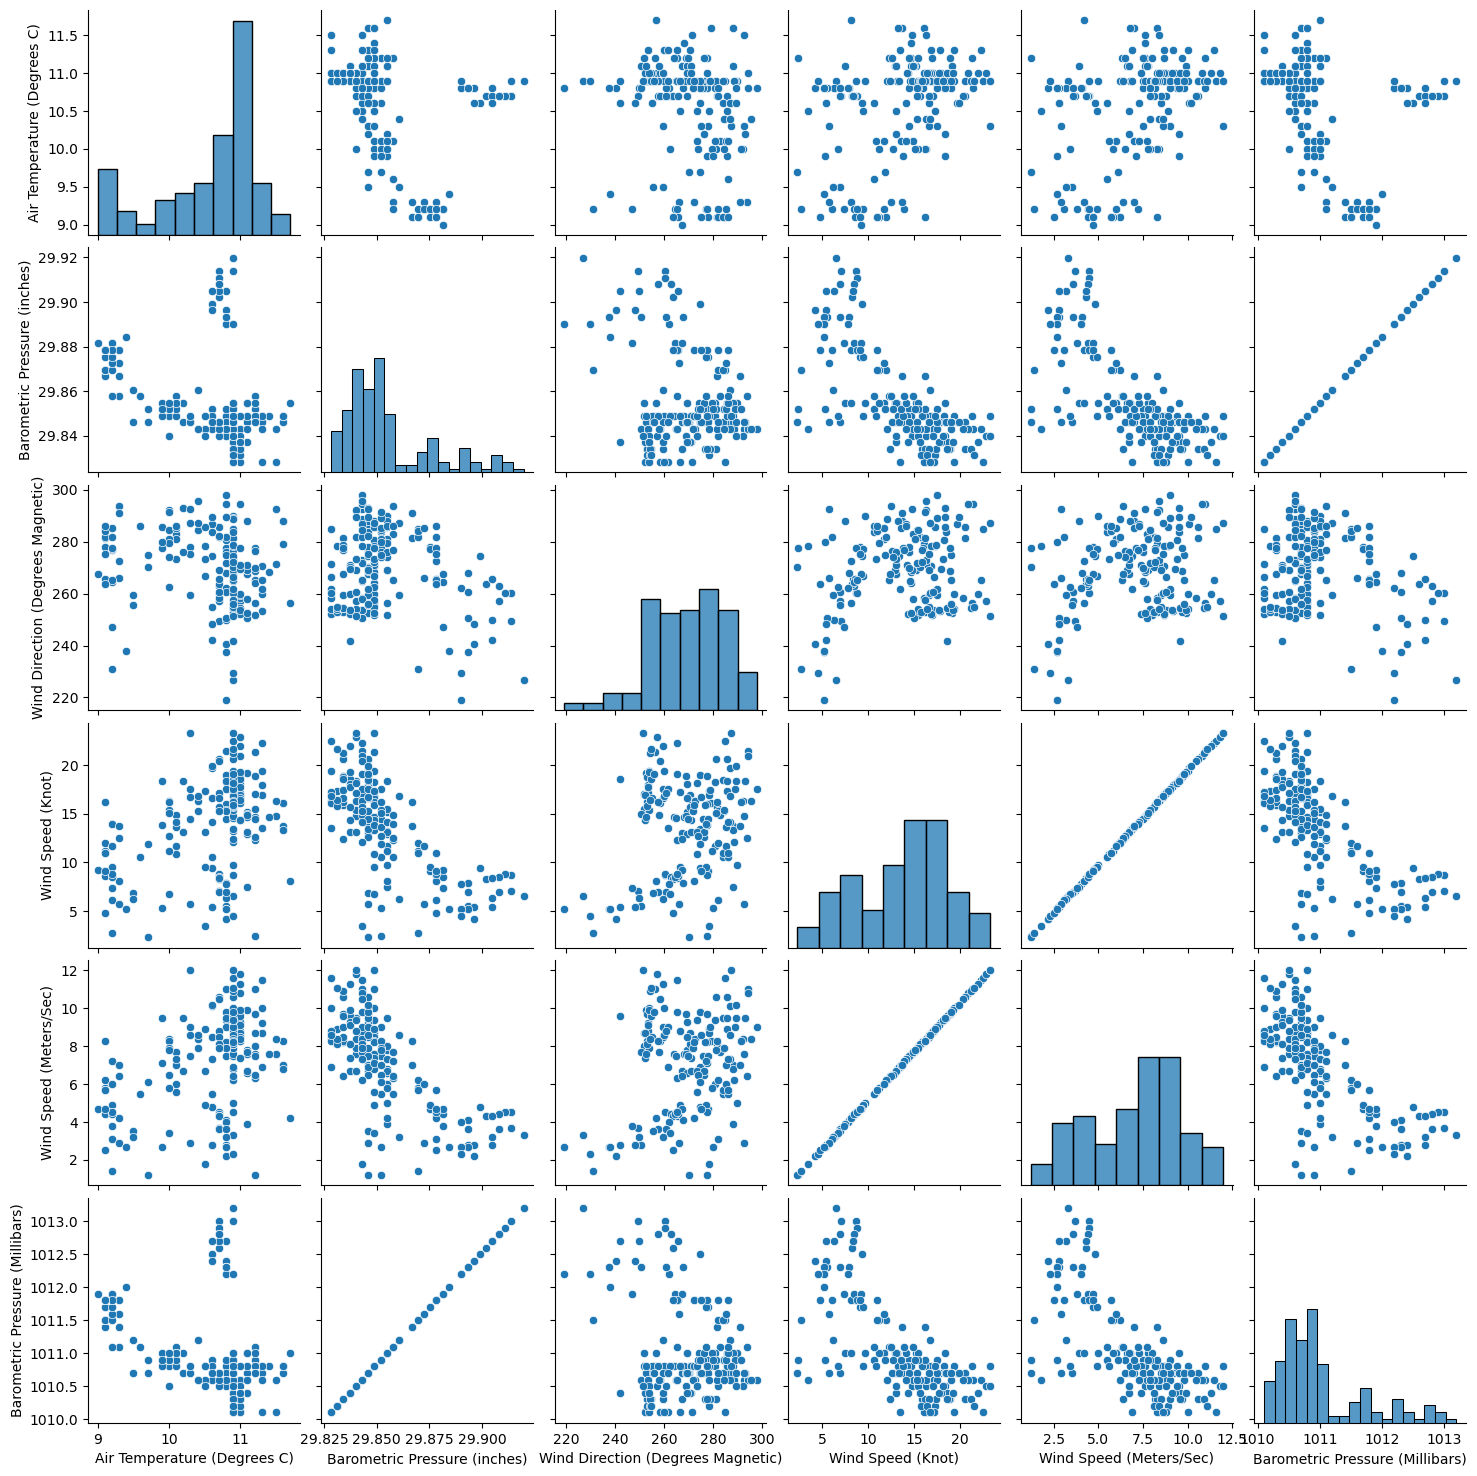

In [13]:
sns.pairplot(df3)
plt.show()

In [14]:
df3

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Wind Speed (Meters/Sec),Barometric Pressure (Millibars),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,3.3,1013.2,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,3.7,1013.0,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,4.5,1013.0,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,4.5,1012.9,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,4.4,1012.8,2015-08-14 00:22:22
...,...,...,...,...,...,...,...,...
245,14/08/2015 22:14:57,9.2,29.8814,247.0,7.4,3.8,1011.9,2015-08-14 22:14:57
246,14/08/2015 22:19:58,9.2,29.8784,265.4,8.8,4.5,1011.8,2015-08-14 22:19:58
247,14/08/2015 22:24:58,9.1,29.8784,275.2,9.1,4.7,1011.8,2015-08-14 22:24:58
248,14/08/2015 22:29:58,9.1,29.8784,263.8,4.8,2.5,1011.8,2015-08-14 22:29:58


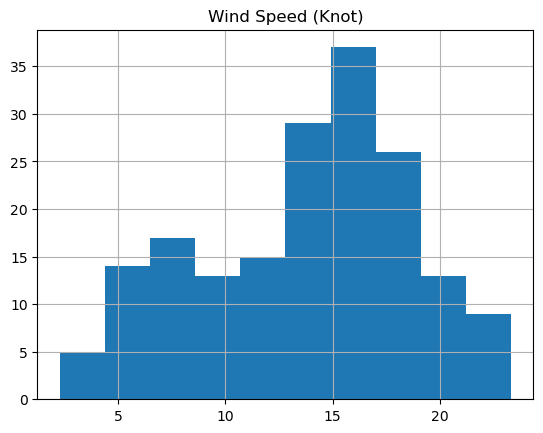

In [15]:
df3.hist('Wind Speed (Knot)')
plt.show()
#hist = df1.hist
#plt.show()


#df1.hist(df1['Air Temperature (Degrees C)'],bins = 10)

In [16]:
idx = pd.date_range(start = "2015-11-08 14:54:33", periods=100, freq="MIN")
idx

DatetimeIndex(['2015-11-08 14:54:33', '2015-11-08 14:55:33',
               '2015-11-08 14:56:33', '2015-11-08 14:57:33',
               '2015-11-08 14:58:33', '2015-11-08 14:59:33',
               '2015-11-08 15:00:33', '2015-11-08 15:01:33',
               '2015-11-08 15:02:33', '2015-11-08 15:03:33',
               '2015-11-08 15:04:33', '2015-11-08 15:05:33',
               '2015-11-08 15:06:33', '2015-11-08 15:07:33',
               '2015-11-08 15:08:33', '2015-11-08 15:09:33',
               '2015-11-08 15:10:33', '2015-11-08 15:11:33',
               '2015-11-08 15:12:33', '2015-11-08 15:13:33',
               '2015-11-08 15:14:33', '2015-11-08 15:15:33',
               '2015-11-08 15:16:33', '2015-11-08 15:17:33',
               '2015-11-08 15:18:33', '2015-11-08 15:19:33',
               '2015-11-08 15:20:33', '2015-11-08 15:21:33',
               '2015-11-08 15:22:33', '2015-11-08 15:23:33',
               '2015-11-08 15:24:33', '2015-11-08 15:25:33',
               '2015-11-

In [17]:
rng = np.random.default_rng()
ts = pd.DataFrame(data=rng.poisson(200,len(idx)),index =idx, columns=['Synthesised Wind Speed (Meters/Sec)'])
ts

,Synthesised Wind Speed (Meters/Sec)
2015-11-08 14:54:33,212
2015-11-08 14:55:33,180
2015-11-08 14:56:33,201
2015-11-08 14:57:33,194
2015-11-08 14:58:33,206
...,...
2015-11-08 16:29:33,211
2015-11-08 16:30:33,197
2015-11-08 16:31:33,193
2015-11-08 16:32:33,205


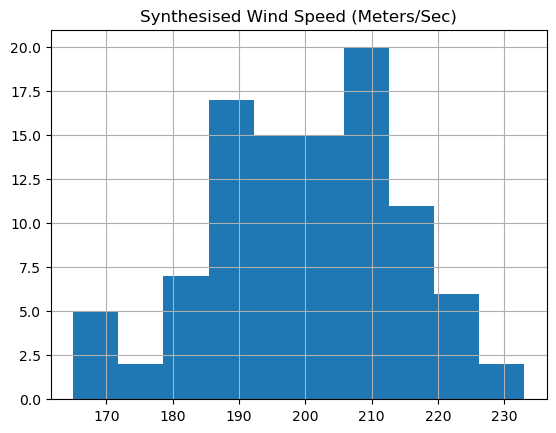

In [18]:
ts.hist()
plt.show()

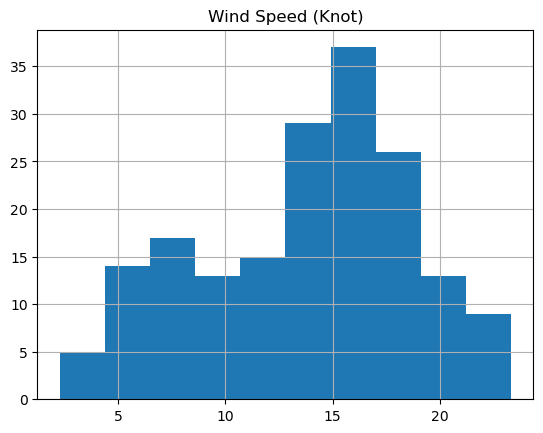

In [19]:
df3.hist('Wind Speed (Knot)')
plt.show()

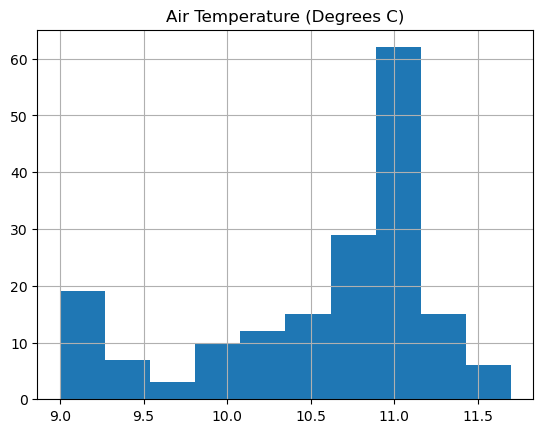

In [20]:
df3.hist('Air Temperature (Degrees C)')
plt.show()

In [21]:
idx1 = pd.date_range(start = "2015-11-08 14:54:33", periods=200, freq="MIN")
idx1

DatetimeIndex(['2015-11-08 14:54:33', '2015-11-08 14:55:33',
               '2015-11-08 14:56:33', '2015-11-08 14:57:33',
               '2015-11-08 14:58:33', '2015-11-08 14:59:33',
               '2015-11-08 15:00:33', '2015-11-08 15:01:33',
               '2015-11-08 15:02:33', '2015-11-08 15:03:33',
               ...
               '2015-11-08 18:04:33', '2015-11-08 18:05:33',
               '2015-11-08 18:06:33', '2015-11-08 18:07:33',
               '2015-11-08 18:08:33', '2015-11-08 18:09:33',
               '2015-11-08 18:10:33', '2015-11-08 18:11:33',
               '2015-11-08 18:12:33', '2015-11-08 18:13:33'],
              dtype='datetime64[ns]', length=200, freq='T')

In [22]:
rng1 = np.random.default_rng()
shape = 5.0
scale = 2.0
values = weibull_min.rvs(shape, scale=scale, size=100)
ts1 = pd.DataFrame(data=rng.weibull(200,len(idx)),index =idx, columns=['Synthesises Weibull'])
ts1

,Synthesises Weibull
2015-11-08 14:54:33,0.995416
2015-11-08 14:55:33,0.992409
2015-11-08 14:56:33,0.998373
2015-11-08 14:57:33,1.006147
2015-11-08 14:58:33,0.984362
...,...
2015-11-08 16:29:33,1.003842
2015-11-08 16:30:33,0.994590
2015-11-08 16:31:33,1.000674
2015-11-08 16:32:33,0.996150


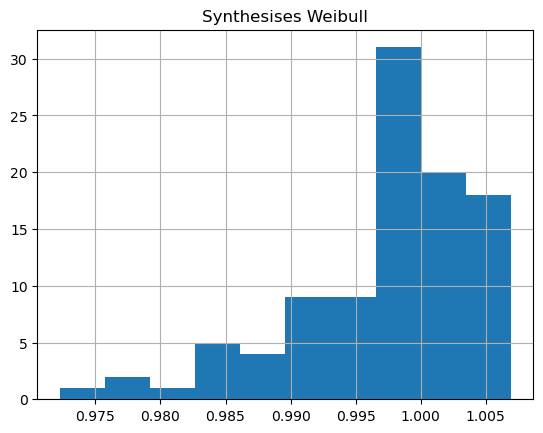

In [23]:
ts1.hist('Synthesises Weibull')
plt.show()

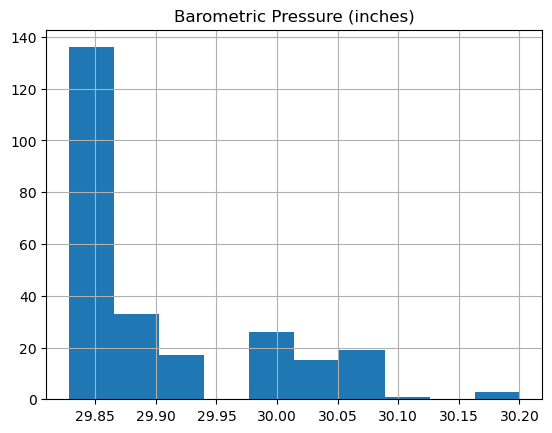

In [24]:
df1.hist('Barometric Pressure (inches)')
plt.show()

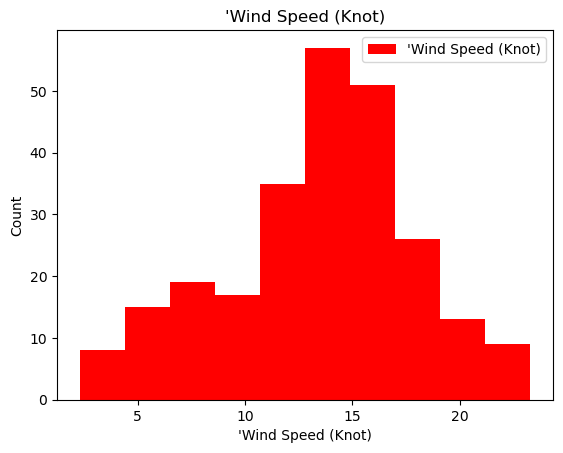

In [25]:
a = df1['Wind Speed (Knot)']
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

In [26]:
idx = pd.date_range("2018-01-01", periods=100, freq="Y")
idx

DatetimeIndex(['2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31',
               '2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31',
               '2034-12-31', '2035-12-31', '2036-12-31', '2037-12-31',
               '2038-12-31', '2039-12-31', '2040-12-31', '2041-12-31',
               '2042-12-31', '2043-12-31', '2044-12-31', '2045-12-31',
               '2046-12-31', '2047-12-31', '2048-12-31', '2049-12-31',
               '2050-12-31', '2051-12-31', '2052-12-31', '2053-12-31',
               '2054-12-31', '2055-12-31', '2056-12-31', '2057-12-31',
               '2058-12-31', '2059-12-31', '2060-12-31', '2061-12-31',
               '2062-12-31', '2063-12-31', '2064-12-31', '2065-12-31',
               '2066-12-31', '2067-12-31', '2068-12-31', '2069-12-31',
               '2070-12-31', '2071-12-31', '2072-12-31', '2073-12-31',
      

In [27]:
rng = np.random.default_rng()



generate random numbers between 0 and 1 , averafe of 25 recoded incidnets per day

In [28]:
ts = pd.DataFrame(data=rng.poisson(25,len(idx)),index =idx, columns=['Incidents recorded']), 
#ts = pd.DataFrame(data=rng.poisson(25,len(idx)),index =idx, columns=['Incidents recorded1'])
#ts1 = pd.DataFrame(data=rng.binomial(p = .75,len(idx)),index =idx, columns=['Incidents recorded1'])

In [29]:
ts


(            Incidents recorded
 2018-12-31                  22
 2019-12-31                  24
 2020-12-31                  26
 2021-12-31                  17
 2022-12-31                  25
 ...                        ...
 2113-12-31                  25
 2114-12-31                  28
 2115-12-31                  23
 2116-12-31                  25
 2117-12-31                  28
 
 [100 rows x 1 columns],)